In [37]:
# Sales Analysis
# Merging 12 months of sales data into a single file
import pandas as pd
import os
import numpy as np
frames = []
foldername = 'C:\Web_Development\Python\python_projects\Sale_Analysis\Sales_Data'
for filename in os.listdir(foldername):
    path = foldername + '\\' + filename
    with open(path, 'r', encoding='utf-8') as fileobj:
        month_data = pd.read_csv(fileobj)
        frames.append(month_data)
data = pd.concat(frames) # data.concat(data, month_data) - this way do not need to store the month_data in a list
# print(data) # can use data.shape to check if we got all the month data
data.to_csv("C:\Web_Development\Python\python_projects\Sale_Analysis\Output\data.csv", index=False)

In [38]:
# Augment data with extra cells
# clean up the data
data.dropna(how='all', inplace=True)
# data.info()
or_data = data[data['Order Date'].str[0:2] == 'Or']
print(or_data)
data = data[data['Order Date'].str[0:2] != 'Or']
data.info()
# Add month colum
data['Month'] = data['Order Date'].str[0:2].astype('int32')
print(data)

       Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893   Order ID  Product  Quantity Ordered  Price Each  Order Date   
...         ...      ...               ...         ...         ...   
10000  Order ID  Product  Quantity Ordered  Price Each  Order Date   
10387  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11399  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11468  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11574  Order ID  Product  Quantity Ordered  Price Each  Order Date   

       Purchase Address  
519    Purchase Address  
1149   Purchase Address  
1155   Purchase Address  
2878   Purchase Address  
2893   Purchase Address  
...

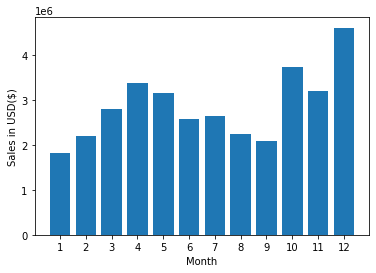

In [45]:
# What was the best month for sales? How much was earned that month? - groupby function
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
# print(data.head())
results = data.groupby('Month').sum()
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month, results['Sales'])
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
plt.show()

In [47]:
# Waht city in the US has the best sale - use the .apply function
def get_city(address):
    return address.split(',')[1]

data['City'] = data['Purchase Address'].apply(lambda x: get_city(x)) # can change get_city to any other functions
# data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])
print(data)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable                 2       11.95   
2       176559  Bose SoundSport Headphones                 1       99.99   
3       176560                Google Phone                 1      600.00   
4       176560            Wired Headphones                 1       11.99   
5       176561            Wired Headphones                 1       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)                 3        2.99   
11682   259354                      iPhone                 1      700.00   
11683   259355                      iPhone                 1      700.00   
11684   259356      34in Ultrawide Monitor                 1      379.99   
11685   259357        USB-C Charging Cable                 1       11.95   

           Order Date                         Purchase Address  Month   Sales  \
0     